In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\jayasree\Hackatan.csv")

In [3]:
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [4]:
df.shape

(2227, 3)

In [5]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [6]:
df.dropna(inplace=True, axis=0) ## removing missing value

In [7]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64


# Bar plots

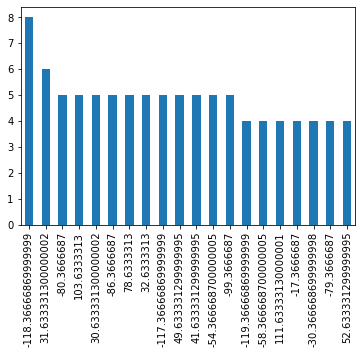

In [8]:
df.x1.value_counts().nlargest(20).plot(kind='bar')
plt.show()

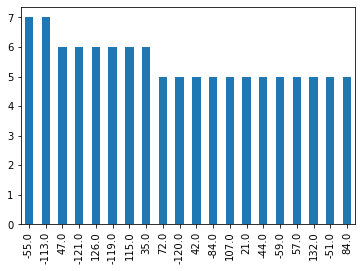

In [9]:
df.x2.value_counts().nlargest(20).plot(kind='bar')
plt.show()

# Countplot,Univariate


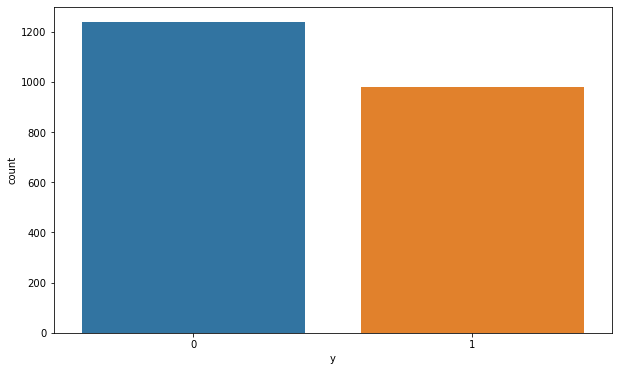

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['y'])
plt.show()

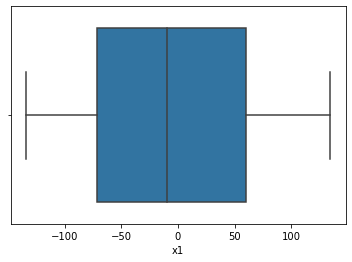

In [11]:
sns.boxplot(x="x1",data=df)

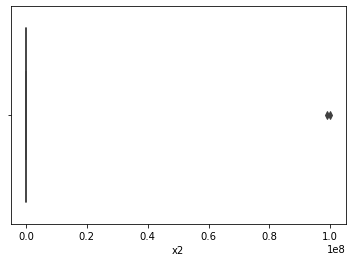

In [12]:
sns.boxplot(x="x2",data=df)

In [13]:
from scipy.stats.mstats import winsorize

In [14]:
df["x2"] = winsorize(df["x2"],(0,0.001))

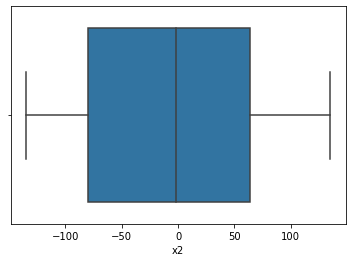

In [15]:
sns.boxplot(x="x2",data=df)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [17]:
x = df.drop(['y'], axis=1)
y = df['y']

In [18]:
x.shape

(2219, 2)

In [19]:
y.shape

(2219,)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1775, 2), (444, 2), (1775,), (444,))

# model builinding

## Logistic Regression


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_fscore_support,classification_report

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [24]:
model.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred=model.predict(x_test)

In [26]:
y_train_pred=model.predict(x_train)

In [27]:
y_train_pred=model.predict(x_train)

In [28]:
training_Score1= accuracy_score(y_train,y_train_pred)
testing_score1 = accuracy_score(y_test,y_pred)
print(f'Accuracyt for training : {training_Score1} and testing : {testing_score1}')

Accuracyt for training : 0.7408450704225352 and testing : 0.7184684684684685


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       241
           1       0.96      0.40      0.56       203

    accuracy                           0.72       444
   macro avg       0.81      0.69      0.68       444
weighted avg       0.80      0.72      0.69       444



## Support vector machine

### SVM with linear kernal

In [30]:
from sklearn import svm
vector = svm.SVC(kernel='linear')
vector.fit(x_train, y_train)
y_pred=vector.predict(x_test)
y_train_pred=vector.predict(x_train)

In [31]:
training_Score2 = accuracy_score(y_train,y_train_pred)
testing_score2 = accuracy_score(y_test,y_pred)
print(f'Accuracyt for training : {training_Score2} and testing : {testing_score2}')

Accuracyt for training : 0.7335211267605634 and testing : 0.7207207207207207


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       241
           1       1.00      0.39      0.56       203

    accuracy                           0.72       444
   macro avg       0.83      0.69      0.68       444
weighted avg       0.82      0.72      0.69       444



### SVM with rbf

In [33]:
from sklearn import svm
vector = svm.SVC(kernel='rbf')
vector.fit(x_train, y_train)
y_pred=vector.predict(x_test)
y_train_pred=vector.predict(x_train)

In [34]:
training_Score3 = accuracy_score(y_train,y_train_pred)
testing_score3 = accuracy_score(y_test,y_pred)
print(f'Accuracyt for training : {training_Score3} and testing : {testing_score3}')

Accuracyt for training : 0.9492957746478873 and testing : 0.9617117117117117


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       241
           1       0.97      0.94      0.96       203

    accuracy                           0.96       444
   macro avg       0.96      0.96      0.96       444
weighted avg       0.96      0.96      0.96       444



# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree= DecisionTreeRegressor(random_state = 0)
tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [37]:
y_pred=tree.predict(x_test)

In [38]:
y_train_pred=tree.predict(x_train)

In [39]:
training_Score4 = accuracy_score(y_train,y_train_pred)
testing_score4 = accuracy_score(y_test,y_pred)
print(f'Accuracyt for training : {training_Score4} and testing : {testing_score4}')

Accuracyt for training : 1.0 and testing : 0.9436936936936937


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       241
           1       0.94      0.94      0.94       203

    accuracy                           0.94       444
   macro avg       0.94      0.94      0.94       444
weighted avg       0.94      0.94      0.94       444



# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [42]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [43]:
y_pred=knn.predict(x_test)

In [44]:
y_train_pred=knn.predict(x_train)

In [45]:
training_Score5 = accuracy_score(y_train,y_train_pred)
testing_score5 = accuracy_score(y_test,y_pred)
print(f'Accuracyt for training : {training_Score5} and testing : {testing_score5}')

Accuracyt for training : 0.9594366197183098 and testing : 0.954954954954955


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       241
           1       0.95      0.95      0.95       203

    accuracy                           0.95       444
   macro avg       0.95      0.95      0.95       444
weighted avg       0.95      0.95      0.95       444



# FINDING BEST ALGORTHIM

In [47]:
comp=[testing_score1,testing_score2,testing_score3,testing_score4,testing_score5]
label=['Logistic Regression','SVM Linear','SVM RBF Kernel','Decission Tree','K Nearest Neighbour']
sl=pd.Series(comp,label)

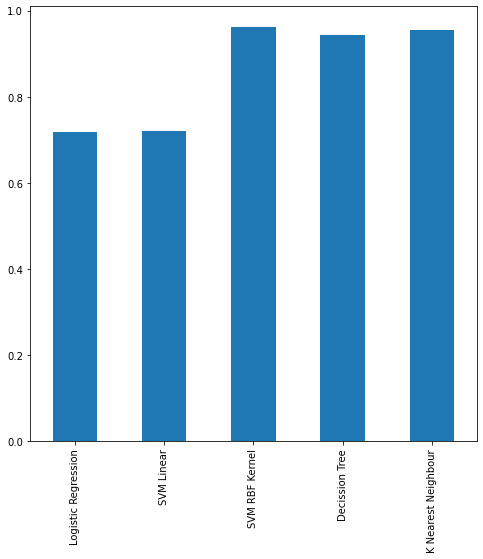

In [48]:
plt.figure(figsize=(8,8))
sl.plot.bar()

## Here i have implemented differnt alogorthims are Logistic regression, SVM linear,SVM RBF kernel, Decision tree,K nearest neighbour and i observed that SVM RBF kernel alogorthim is performing more accuracy